In [81]:
!pip install mlxtend

import pandas as pd
import numpy as np
from mlxtend.plotting import plot_decision_regions

In [288]:
df = pd.DataFrame()

In [289]:
df['x1']=[1,2,3,4,5,6,6,7,9,9]
df['x2']=[5,3,6,8,1,9,5,8,9,2]
df['label']=[1,1,0,1,0,1,0,1,0,0]

In [292]:
df

,x1,x2,label
0,1,5,1
1,2,3,1
2,3,6,0
3,4,8,1
4,5,1,0
5,6,9,1
6,6,5,0
7,7,8,1
8,9,9,0
9,9,2,0


<Axes: xlabel='x1', ylabel='x2'>

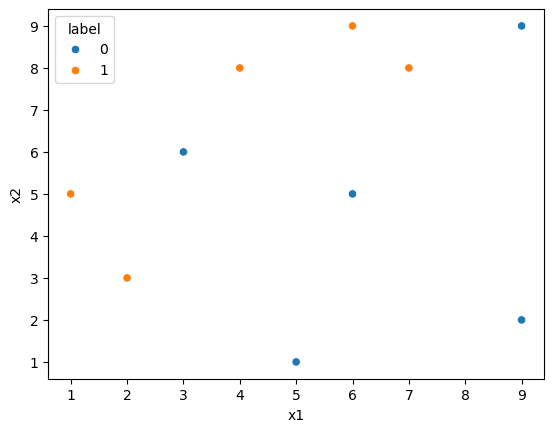

In [294]:
import seaborn as sns
sns.scatterplot(x=df['x1'],y=df['x2'],hue=df['label'])

In [295]:
df.shape

(10, 3)

In [296]:
df['weights'] = 1/df.shape[0]

In [297]:
df

,x1,x2,label,weights
0,1,5,1,0.1
1,2,3,1,0.1
2,3,6,0,0.1
3,4,8,1,0.1
4,5,1,0,0.1
5,6,9,1,0.1
6,6,5,0,0.1
7,7,8,1,0.1
8,9,9,0,0.1
9,9,2,0,0.1


In [298]:
from sklearn.tree import DecisionTreeClassifier

In [303]:
dt1 = DecisionTreeClassifier(max_depth =1 )

In [306]:
x = df.iloc[:,0:2].values
y = df.iloc[:,2].values


In [308]:
# step -2 train 1st model
dt1.fit(x,y)

DecisionTreeClassifier(max_depth=1)

[Text(0.5, 0.75, 'x[1] <= 2.5\ngini = 0.5\nsamples = 10\nvalue = [5, 5]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.375, 0.5, 'True  '),
 Text(0.75, 0.25, 'gini = 0.469\nsamples = 8\nvalue = [3, 5]'),
 Text(0.625, 0.5, '  False')]

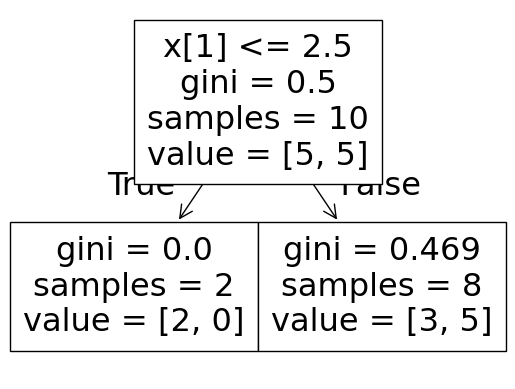

In [310]:
from sklearn.tree import plot_tree
plot_tree(df1)

<Axes: >

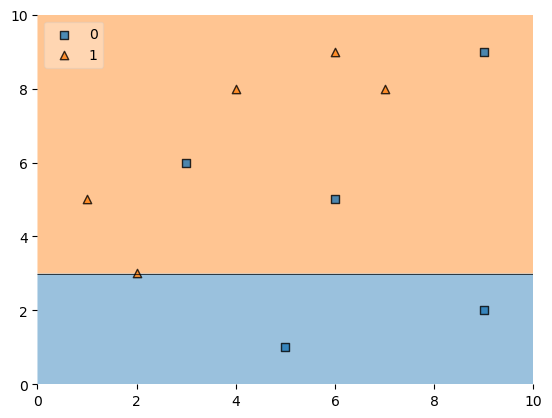

In [311]:
plot_decision_regions(x, y, clf=dt1, legend=2)

In [313]:
df['y_pred'] = dt1.predict(x)

In [314]:
df

,x1,x2,label,weights,y_pred
0,1,5,1,0.1,1
1,2,3,1,0.1,1
2,3,6,0,0.1,1
3,4,8,1,0.1,1
4,5,1,0,0.1,0
5,6,9,1,0.1,1
6,6,5,0,0.1,1
7,7,8,1,0.1,1
8,9,9,0,0.1,1
9,9,2,0,0.1,0


In [318]:
def calculate_mode_weight(error):
    return 0.5*np.log((1-error)/(error))

In [320]:
# step 3 - calculate model weight
alpha1 = calculate_mode_weight(0.3)
alpha1

0.42364893019360184

In [322]:
# step 4 - update weight

def update_row_weigths(row,alpha = 0.42364893019360184):
    if row['label'] == row['y_pred']:
        return row['weights']* np.exp(-alpha)
    else:
       return row['weights']* np.exp(alpha) 

In [324]:
df['updated_weights'] = df.apply(update_row_weigths,axis=1)

In [326]:
df

,x1,x2,label,weights,y_pred,updated_weights
0,1,5,1,0.1,1,0.065465
1,2,3,1,0.1,1,0.065465
2,3,6,0,0.1,1,0.152753
3,4,8,1,0.1,1,0.065465
4,5,1,0,0.1,0,0.065465
5,6,9,1,0.1,1,0.065465
6,6,5,0,0.1,1,0.152753
7,7,8,1,0.1,1,0.065465
8,9,9,0,0.1,1,0.152753
9,9,2,0,0.1,0,0.065465


In [328]:
df['updated_weights'].sum()

0.9165151389911682

In [330]:
df['normalized_weights'] = df['updated_weights']/df['updated_weights'].sum()

In [332]:
df

,x1,x2,label,weights,y_pred,updated_weights,normalized_weights
0,1,5,1,0.1,1,0.065465,0.071429
1,2,3,1,0.1,1,0.065465,0.071429
2,3,6,0,0.1,1,0.152753,0.166667
3,4,8,1,0.1,1,0.065465,0.071429
4,5,1,0,0.1,0,0.065465,0.071429
5,6,9,1,0.1,1,0.065465,0.071429
6,6,5,0,0.1,1,0.152753,0.166667
7,7,8,1,0.1,1,0.065465,0.071429
8,9,9,0,0.1,1,0.152753,0.166667
9,9,2,0,0.1,0,0.065465,0.071429


In [334]:
df['normalized_weights'].sum()

0.9999999999999999

In [336]:
df['cumsum_upper'] = np.cumsum(df['normalized_weights'])

In [338]:
df['cumsum_lower'] = df['cumsum_upper'] - df['normalized_weights']

In [340]:
df[['x1','x2','label','weights','y_pred','updated_weights','cumsum_lower','cumsum_upper']]

,x1,x2,label,weights,y_pred,updated_weights,cumsum_lower,cumsum_upper
0,1,5,1,0.1,1,0.065465,0.000000,0.071429
1,2,3,1,0.1,1,0.065465,0.071429,0.142857
2,3,6,0,0.1,1,0.152753,0.142857,0.309524
3,4,8,1,0.1,1,0.065465,0.309524,0.380952
4,5,1,0,0.1,0,0.065465,0.380952,0.452381
5,6,9,1,0.1,1,0.065465,0.452381,0.523810
6,6,5,0,0.1,1,0.152753,0.523810,0.690476
7,7,8,1,0.1,1,0.065465,0.690476,0.761905
8,9,9,0,0.1,1,0.152753,0.761905,0.928571
9,9,2,0,0.1,0,0.065465,0.928571,1.000000


In [342]:
def create_new_dataset(df):

    indices =[]

    for i in range(df.shape[0]):
        a= np.random.random()
        for index ,row in df.iterrows():
            if row['cumsum_upper'] > a and a > row['cumsum_lower']:
                indices.append(index)
    return indices           



In [344]:
index_values = create_new_dataset(df)

index_values

[8, 9, 9, 4, 4, 8, 1, 2, 8, 9]

In [346]:
second_df = df.iloc[index_values,[0,1,2,3]]

In [348]:
second_df

,x1,x2,label,weights
8,9,9,0,0.1
9,9,2,0,0.1
9,9,2,0,0.1
4,5,1,0,0.1
4,5,1,0,0.1
8,9,9,0,0.1
1,2,3,1,0.1
2,3,6,0,0.1
8,9,9,0,0.1
9,9,2,0,0.1


In [350]:
dt2 = DecisionTreeClassifier(max_depth=1)

In [352]:
x = second_df.iloc[:,0:2].values
y = second_df.iloc[:,2].values

In [354]:
dt2.fit(x,y)

DecisionTreeClassifier(max_depth=1)

[Text(0.5, 0.75, 'x[0] <= 2.5\ngini = 0.18\nsamples = 10\nvalue = [9, 1]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.375, 0.5, 'True  '),
 Text(0.75, 0.25, 'gini = 0.0\nsamples = 9\nvalue = [9, 0]'),
 Text(0.625, 0.5, '  False')]

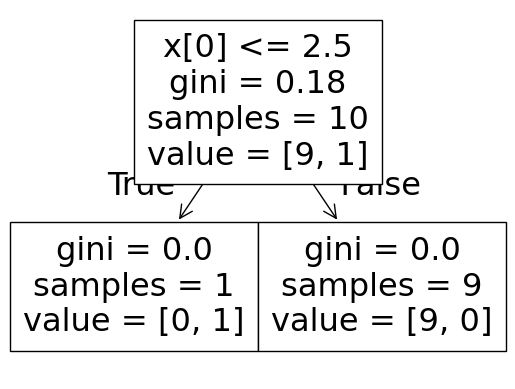

In [356]:
plot_tree(dt2)

<Axes: >

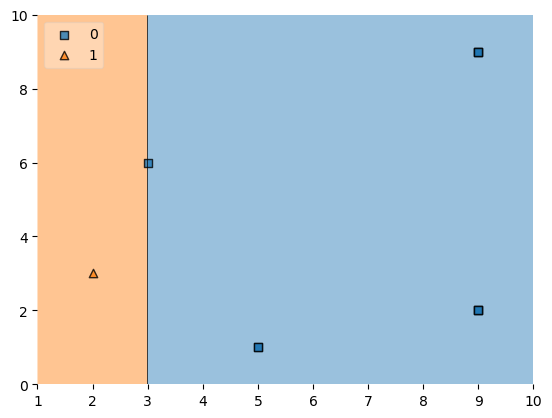

In [358]:
plot_decision_regions(x, y, clf=dt2, legend=2)

In [360]:
second_df['y_pred'] = dt2.predict(x)

In [362]:
second_df

,x1,x2,label,weights,y_pred
8,9,9,0,0.1,0
9,9,2,0,0.1,0
9,9,2,0,0.1,0
4,5,1,0,0.1,0
4,5,1,0,0.1,0
8,9,9,0,0.1,0
1,2,3,1,0.1,1
2,3,6,0,0.1,0
8,9,9,0,0.1,0
9,9,2,0,0.1,0


In [364]:
alpha2 = calculate_mode_weight(0.1)
alpha2

1.0986122886681098

In [366]:
# step 4 - update weight

def update_row_weigths(row,alpha = 1.0986122886681098):
    if row['label'] == row['y_pred']:
        return row['weights']* np.exp(-alpha)
    else:
       return row['weights']* np.exp(alpha) 

In [368]:
second_df['updated_weights'] = second_df.apply(update_row_weigths,axis=1)

In [370]:
second_df

,x1,x2,label,weights,y_pred,updated_weights
8,9,9,0,0.1,0,0.033333
9,9,2,0,0.1,0,0.033333
9,9,2,0,0.1,0,0.033333
4,5,1,0,0.1,0,0.033333
4,5,1,0,0.1,0,0.033333
8,9,9,0,0.1,0,0.033333
1,2,3,1,0.1,1,0.033333
2,3,6,0,0.1,0,0.033333
8,9,9,0,0.1,0,0.033333
9,9,2,0,0.1,0,0.033333


In [372]:
second_df['updated_weights'].sum()

0.3333333333333333

In [374]:
second_df['normalized_weights'] = second_df['updated_weights']/second_df['updated_weights'].sum()

In [376]:
second_df

,x1,x2,label,weights,y_pred,updated_weights,normalized_weights
8,9,9,0,0.1,0,0.033333,0.1
9,9,2,0,0.1,0,0.033333,0.1
9,9,2,0,0.1,0,0.033333,0.1
4,5,1,0,0.1,0,0.033333,0.1
4,5,1,0,0.1,0,0.033333,0.1
8,9,9,0,0.1,0,0.033333,0.1
1,2,3,1,0.1,1,0.033333,0.1
2,3,6,0,0.1,0,0.033333,0.1
8,9,9,0,0.1,0,0.033333,0.1
9,9,2,0,0.1,0,0.033333,0.1


In [378]:
second_df['normalized_weights'].sum()

1.0

In [380]:
second_df['cumsum_upper'] = np.cumsum(second_df['normalized_weights'])

In [382]:
second_df['cumsum_lower'] = second_df['cumsum_upper'] - second_df['normalized_weights']

In [384]:
second_df[['x1','x2','label','weights','y_pred','updated_weights','cumsum_lower','cumsum_upper']]

,x1,x2,label,weights,y_pred,updated_weights,cumsum_lower,cumsum_upper
8,9,9,0,0.1,0,0.033333,0.0,0.1
9,9,2,0,0.1,0,0.033333,0.1,0.2
9,9,2,0,0.1,0,0.033333,0.2,0.3
4,5,1,0,0.1,0,0.033333,0.3,0.4
4,5,1,0,0.1,0,0.033333,0.4,0.5
8,9,9,0,0.1,0,0.033333,0.5,0.6
1,2,3,1,0.1,1,0.033333,0.6,0.7
2,3,6,0,0.1,0,0.033333,0.7,0.8
8,9,9,0,0.1,0,0.033333,0.8,0.9
9,9,2,0,0.1,0,0.033333,0.9,1.0


In [386]:
index_values = create_new_dataset(df)

index_values

[3, 0, 6, 4, 2, 6, 3, 8, 7, 3]

In [388]:
third_df = df.iloc[index_values,[0,1,2,3]]

In [390]:
third_df

,x1,x2,label,weights
3,4,8,1,0.1
0,1,5,1,0.1
6,6,5,0,0.1
4,5,1,0,0.1
2,3,6,0,0.1
6,6,5,0,0.1
3,4,8,1,0.1
8,9,9,0,0.1
7,7,8,1,0.1
3,4,8,1,0.1


In [392]:
dt3 = DecisionTreeClassifier(max_depth=1)

In [394]:
x = third_df.iloc[:,0:2].values
y = third_df.iloc[:,2].values

In [396]:
dt3.fit(x,y)

DecisionTreeClassifier(max_depth=1)

<Axes: >

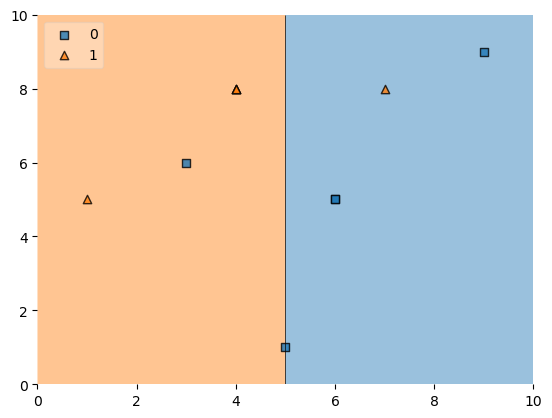

In [398]:
plot_decision_regions(x, y, clf=dt3, legend=2)

In [400]:
third_df['y_pred'] = dt3.predict(x)

In [402]:
third_df

,x1,x2,label,weights,y_pred
3,4,8,1,0.1,1
0,1,5,1,0.1,1
6,6,5,0,0.1,0
4,5,1,0,0.1,0
2,3,6,0,0.1,1
6,6,5,0,0.1,0
3,4,8,1,0.1,1
8,9,9,0,0.1,0
7,7,8,1,0.1,0
3,4,8,1,0.1,1


In [404]:
alpha3 = calculate_mode_weight(0.2)
alpha3

0.6931471805599453

In [406]:
print(alpha1 ,alpha2 ,alpha3)

0.42364893019360184 1.0986122886681098 0.6931471805599453


In [408]:
# prediction

In [410]:
query = np.array([1,5]).reshape(1,2)
dt1.predict(query)

array([1], dtype=int64)

In [412]:
dt2.predict(query)

array([1], dtype=int64)

In [414]:
dt3.predict(query)

array([1], dtype=int64)

In [416]:
alpha1 *1 + alpha2 *(-1) + alpha3*1

0.01818382208543734

In [418]:
np.sign(0.018)

1.0

In [420]:
query = np.array([9,9]).reshape(1,2)

In [422]:
dt1.predict(query)

array([1], dtype=int64)

In [424]:
dt2.predict(query)

array([0], dtype=int64)

In [426]:
dt3.predict(query)

array([0], dtype=int64)

In [428]:
alpha1 *1 + alpha2 *1 + alpha3*(-1)

0.8291140383017664

In [430]:
np.sign(0.8291)

1.0